In [1]:
import sys, os
import dask
from dask.diagnostics import ProgressBar

sys.path.append(os.getenv("HOME")+'/hextof-newdata/hextof-processor/')
from processor.DldFlashDataframeCreatorNew import readData, DldProcessor
from processor.utilities import calibration, diagnostics, misc, io, vis,dfops
settings = 'Jonas_2020_express'


# first time readout: slow

In [3]:
prc = readData(35990,settings=settings)

Using settings from Jonas_2020_express.ini
reading runs run35990: 27 new files of 27 total.
[########################################] | 100% Completed | 35min 50.4s
Loading 27 dataframes. Failed reading 0 files.


# Second time readout: very fast

In [ ]:
prc = readData(35990,settings=settings)

# Binning

In [4]:
prc = readData(35990,settings=settings)
prc.addBinning('dldTime',580,800,0.01)
res = prc.computeBinnedData()


Using settings from Jonas_2020_express.ini
reading runs run35990: 0 new files of 27 total.
Loading 27 dataframes. Failed reading 0 files.


  0%|          | 0/3 [00:00<?, ?it/s]

Failed creating metadata: 'forced to skip metadata creation'


<IPython.core.display.Javascript object>


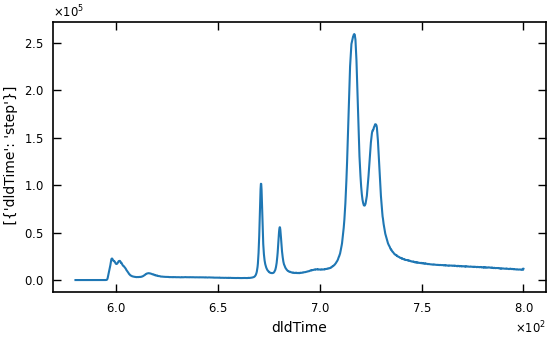

In [5]:
plt.figure()
res.plot()

In [11]:
prc = readData(35990,settings=settings)
prc.resetBins()
prc.addBinning('dldTime',580,800,0.01)
prc.addBinning('dldPosX',400,900,4)
prc.addBinning('dldPosY',400,900,4)
prc.addBinning('delayStage',*dask.compute(prc.dd.delayStage.min(),prc.dd.delayStage.max()),0.5)
res4D = prc.computeBinnedData()


Using settings from Jonas_2020_express.ini
reading runs run35990: 0 new files of 27 total.
Loading 27 dataframes. Failed reading 0 files.


  0%|          | 0/3 [00:00<?, ?it/s]

Failed creating metadata: 'forced to skip metadata creation'


<IPython.core.display.Javascript object>


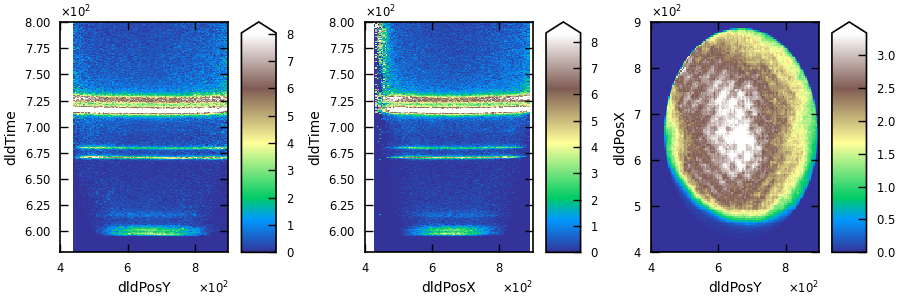

In [16]:
f,ax = plt.subplots(1,3,figsize=(9,3))
r = res4D.mean('delayStage')
img = r.sel(dldPosX=slice(640,660)).mean('dldPosX')
img = img/img.mean('dldTime')
img.plot(cmap='terrain',robust=True,ax=ax[0])
img = r.sel(dldPosY=slice(640,660)).mean('dldPosY')
img = img/img.mean('dldTime')
img.plot(cmap='terrain',robust=True,ax=ax[1])
img = r.sel(dldTime=slice(710,720)).mean('dldTime')
img.plot(cmap='terrain',robust=True,ax=ax[2])

<IPython.core.display.Javascript object>


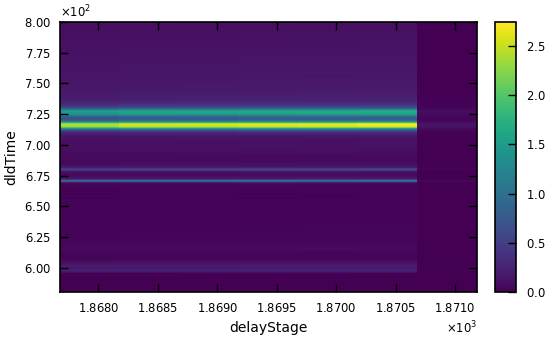

In [20]:

plt.figure()
res4D.mean(('dldPosX','dldPosY')).plot()

# with calibrations
### parameters are taken from the default values defined in the given settings file

In [56]:
prc = readData(35990,settings=settings)
prc.calibrateEnergy()
prc.calibrateMomentum()
prc.calibratePumpProbeTime(t0=1870)
prc.resetBins()


Using settings from Jonas_2020_express.ini
reading runs run35990: 0 new files of 27 total.
Loading 27 dataframes. Failed reading 0 files.
computing energy offsets...
[########################################] | 100% Completed |  6.6s


In [57]:
prc.resetBins()
prc.addBinning('energy',-43,-36,0.02)
# prc.addBinning('kx',-240,240,12)
# prc.addBinning('ky',-240,240,12)
prc.addBinning('pumpProbeTime',-1,3,.05)
res = prc.computeBinnedData()

  0%|          | 0/3 [00:00<?, ?it/s]

Failed creating metadata: 'forced to skip metadata creation'


In [58]:
f,ax = plt.subplots(1,2,figsize=(8,4))
img = res/res.mean('energy')
img.plot(cmap='terrain',robust=True,ax=ax[0])
unp = img.sel(pumpProbeTime=slice(-10,-0.2)).mean('pumpProbeTime')
diff = (img-unp)
diff.plot(cmap='bwr',robust=True,ax=ax[1])
# pump = res.sel(pumpProbeTime=slice()).mean('pumpProbeTime')

<IPython.core.display.Javascript object>